# Visualization/Analysis of Local GTFS-RT

In [1]:
import json
import os

from datetime import datetime, timezone

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz
import seaborn as sns

TZ = pytz.timezone('America/Los_Angeles')
sns.set_style('whitegrid')
path = './transit_vis/data/to_upload'

### Process the Local Summarize_RDS Data

In [2]:
# Join all the data which is saved in different csv for each day
# files = os.listdir(path)
# frames = [pd.read_csv(f"{path}/{filename}", dtype={'trip_short_name': str, 'route_short_name': str}) for filename in files]
# all_data = pd.concat(frames)
# all_data.to_csv(f"{path}/../all_data.csv")
# all_data.head()

In [3]:
read_cols = ['tripid',
             'dist_diff',
             'speed_m_s',
             'deviation_change_s',
             'seg_compkey']
col_types = {'tripid':int,
             'dist_diff':float,
             'speed_m_s':float,
             'deviation_change_s':int,
             'seg_compkey':int}

all_data = []
test_samples = []
chunksize = 10 ** 5

def ff_percentile(data):
    return np.percentile(data, 95)

def process(chunk):
    # Calculate Pace
    chunk['speed_mph'] = chunk['speed_m_s']*2.237
    chunk['pace_s_mi'] = 1 / (chunk['speed_m_s']*.0006214)

    # Add date to the data
#     chunk['day'] = pd.to_datetime(chunk['locationtime'], unit='s')
#     chunk['day'] = chunk['day'].dt.strftime('%Y-%m-%d')
    
    # Get 95th percentile pace for segments
    freeflow = chunk[['seg_compkey','pace_s_mi']].groupby('seg_compkey').agg(ff_percentile).reset_index()    
    chunk = pd.merge(chunk, freeflow, on='seg_compkey', suffixes=[None, '_95'])
        
    # Calculate metrics
    chunk['delay_stochastic'] = chunk['deviation_change_s']
    chunk['delay_total'] = (chunk['pace_s_mi_95'] - chunk['pace_s_mi']) * chunk['dist_diff'] * 0.0006214
    chunk['delay_systematic'] = chunk['delay_total'] - chunk['delay_stochastic']
    
    # Aggregate by segments
    # Save 10% of data as samples
    return [chunk.sample(int(len(chunk)/10)), chunk.groupby('seg_compkey').agg([np.median,
                                             ff_percentile,
                                             pd.Series.count])]

# Read each month of data, a day at a time, broken into chunks for faster processing
# Calculate segment metrics + 10% sample from each chunk, and save
for month_num in range(1,13):
    print(f"Month: {month_num}")
    files = os.listdir(f"{path}/{month_num}")
    for day_num in files:
        print(f"Day: {day_num}")
        i = 0
        for chunk in pd.read_csv(f"{path}/{month_num}/{day_num}", chunksize=chunksize, usecols=read_cols, dtype=col_types):
            i+=1
            print(f"Chunk: {i}")
            result = process(chunk)
            test_samples.append(result[0])
            all_data.append(result[1])

Month: 1
Day: 01_05_2021.csv
Chunk: 1


/home/zack/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_18_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_13_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_06_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_12_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_24_2021.csv
Chunk: 1
Chunk: 2
Day: 01_03_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 01_15_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_01_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 01_29_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_31_2021.csv
Chunk: 1
Chunk: 2
Day: 01_08_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_21_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_23_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 01_17_2021.csv
Chunk: 1
Chunk: 2
Day: 01_02_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 01_14_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_20_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_04_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 01_22_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4

Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_03_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 06_08_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_14_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_12_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_11_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 06_23_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 06_20_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_26_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_22_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_17_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 06_13_2021.csv
Chunk: 1
Chunk: 2
Day: 06_06_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_01_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 06_27_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_24_2021.csv
Chunk: 1
Chunk: 2
Day: 06_19_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 06_29_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 06_18_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 06_07_2021.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 06_04_2021.csv
Chunk:

Day: 12_18_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_24_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_25_2020.csv
Chunk: 1
Chunk: 2
Day: 12_09_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_05_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 12_20_2020.csv
Chunk: 1
Chunk: 2
Day: 12_07_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_13_2020.csv
Chunk: 1
Chunk: 2
Day: 12_08_2020.csv
Chunk: 1
Chunk: 2
Day: 12_30_2020.csv
Chunk: 1
Chunk: 2
Day: 12_28_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_27_2020.csv
Chunk: 1
Chunk: 2
Day: 12_31_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_04_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_23_2020.csv
Chunk: 1
Chunk: 2
Day: 12_03_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_12_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Day: 12_15_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_29_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_11_2020.csv
Chunk: 1
Chunk: 2
Chunk: 3
Chunk: 4
Day: 12_10_2020.csv
Chun

In [4]:
# Combine metrics calculated for each segment across all chunks
data = pd.concat(all_data).dropna().groupby('seg_compkey').mean()
data.head()
print(len(data))

8879


In [5]:
# Save segment values for GIS mapping
segment_metrics_data = data[[('delay_total','median'),
                             ('delay_systematic','median'),
                             ('delay_stochastic','median'),
                             ('pace_s_mi','median')]]
segment_metrics_data = segment_metrics_data[segment_metrics_data < np.inf]
segment_metrics_data = segment_metrics_data[segment_metrics_data > -np.inf]
segment_metrics_data = segment_metrics_data.dropna().reset_index()
segment_metrics_data.columns = segment_metrics_data.columns.droplevel(1)
segment_metrics_data.to_csv(f"{path}/../segment_metrics_data.csv")
segment_metrics_data

,seg_compkey,delay_total,delay_systematic,delay_stochastic,pace_s_mi
0,51,89.541048,97.580449,-7.473896,160.683648
1,52,137.391883,142.405076,-5.086124,168.413027
2,53,171.563356,176.705473,-3.893130,160.242180
3,54,4.461799,12.799148,-8.385542,208.826880
4,55,78.254590,100.198954,-21.502326,144.388831
...,...,...,...,...,...
8874,140652,10.805218,31.137516,-20.107843,249.454482
8875,140653,10.971203,11.410937,-0.584559,205.550236
8876,140749,1.182577,-3.965860,5.148438,158.418008
8877,140751,12.724919,0.383465,12.273256,161.717226


In [6]:
# Combine samples to get 10% of overall dataset stored as individual delays
sample_data = pd.concat(test_samples)

# Save sample data for analysis in jupyter
sample_data = sample_data[sample_data < np.inf]
sample_data = sample_data[sample_data > -np.inf]
sample_data.dropna(inplace=True)
sample_data.to_csv(f"{path}/../sample_metrics_data.csv")
sample_data

,tripid,dist_diff,speed_m_s,deviation_change_s,seg_compkey,speed_mph,pace_s_mi,pace_s_mi_95,delay_stochastic,delay_total,delay_systematic
82566,46413193,54.892262,2.0,23,134917,4.474,804.634696,1609.269392,23,27.446131,4.446131
90921,46696265,339.872915,21.0,-37,28133,46.977,76.631876,172.996460,-37,20.351914,57.351914
21664,34746506,626.123666,11.0,-38,26828,24.607,146.297217,1609.269392,-38,569.203333,607.203333
40169,40422206,356.739446,12.0,-16,72897,26.844,134.105783,750.992383,-16,136.750121,152.750121
30610,34746802,596.867228,13.0,-113,70859,29.081,123.789953,444.464880,-113,118.936180,231.936180
...,...,...,...,...,...,...,...,...,...,...,...
10793,50119253,465.258416,11.0,-23,56916,24.607,146.297217,297.714837,-23,43.776587,66.776587
1527,49787927,540.732943,20.0,-19,91625,44.740,80.463470,149.751457,-19,23.281557,42.281557
8743,49788127,65.716496,1.0,46,63158,2.237,1609.269392,1367.878983,46,-9.857474,-55.857474
8822,49788347,328.554606,11.0,-94,103422,24.607,146.297217,670.528913,-94,107.029152,201.029152


### Distributions of Key Characteristics/Metrics

In [13]:
# Read in data processed above
sample_data = pd.read_csv(f"{path}/../sample_metrics_data.csv")
segment_data = pd.read_csv(f"{path}/../segment_metrics_data.csv")

In [14]:
print(np.median(sample_data['delay_stochastic']))
print(np.median(sample_data['delay_systematic']))
print(np.median(sample_data['delay_total']))
print()
print(np.std(sample_data['delay_stochastic']))
print(np.std(sample_data['delay_systematic']))
print(np.std(sample_data['delay_total']))

-19.0
95.81883599202668
71.91887391375076

34.11991948297005
185.610828046273
169.57152344166067


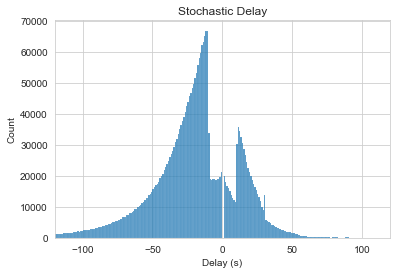

In [15]:
x = sample_data['delay_stochastic'].dropna()
x = x[x < np.inf]
x = x[x > -np.inf]
sns.histplot(x.values, binwidth=1).set(xlabel='Delay (s)', xlim=(-120,120), title=f"Stochastic Delay")
plt.show()

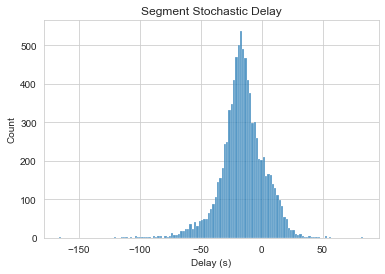

In [16]:
sns.histplot(segment_data['delay_stochastic']).set(xlabel='Delay (s)', title=f"Segment Stochastic Delay")
plt.show()

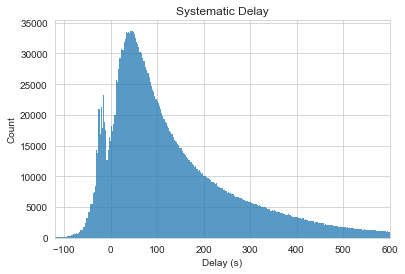

In [17]:
y = sample_data['delay_systematic'].dropna()
y = y[y < np.inf]
y = y[y > -np.inf]
sns.histplot(y.values).set(xlabel='Delay (s)', xlim=(-120,600), title=f"Systematic Delay")
# sns.displot(y.values, kind="kde", bw_adjust=.1).set(xlabel='Delay (s)', xlim=(-120,1000), title=f"Systematic Delay")
plt.show()

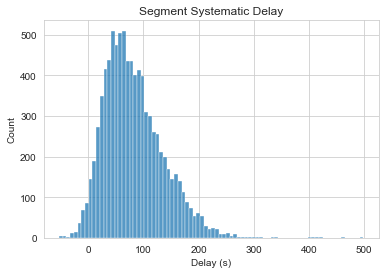

In [18]:
sns.histplot(segment_data['delay_systematic']).set(xlabel='Delay (s)', title=f"Segment Systematic Delay")
plt.show()

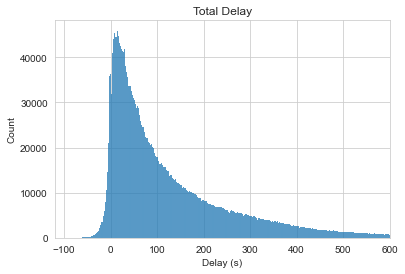

In [19]:
z = sample_data['delay_total'].dropna()
z = z[z < np.inf]
z = z[z > -np.inf]
sns.histplot(z.values[z!=0]).set(xlabel='Delay (s)', xlim=(-120,600), title=f"Total Delay")
plt.show()

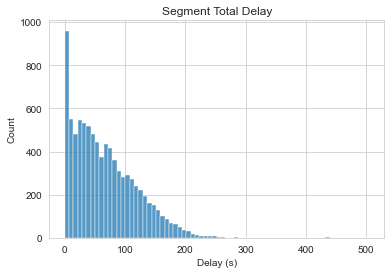

In [20]:
sns.histplot(segment_data['delay_total']).set(xlabel='Delay (s)', title=f"Segment Total Delay")
plt.show()